# Case Study 3. Interarrival Times

Researchers in the Department of Engineering Science use optimisation
techniques to reconfigure existing (or design new) Storage Area Networks
(SANs). In order to verify the performance of these designs they build
computer simulations and test the performance of each SAN under peak
traffic conditions.

One Masters project for 2005 involved the development of a simulation
for the existing Cecil SAN using ARENA (a simulation package introduced
in ENGSCI 355). In order to model this network it was necessary to
estimate the mean flow rates (in terms of interarrival time) at each of
the servers, in the peak time period. The arrival times for the first 38
jobs sent to "Server 26" in the peak time period are stored in the
following variable:

\begin{align*}
\textbf{StartTime} &\quad\quad \textrm{the arrival time for the particular job to Server 26}
\end{align*}

In [1]:
options(jupyter.plot_mimetypes = c("text/latex", "image/jpeg"))
install.packages("s20x")
library(s20x)
library(repr)
options(repr.plot.width=8, repr.plot.height=6)

Installing package into ‘/home/nbuser/R’
(as ‘lib’ is unspecified)


In [2]:
SAN.df = read.table('data/CecilOneSample.txt', header = TRUE)
names(SAN.df)

[1] "EndTime"     "StartTime"   "Source"      "Destination" "Location"   
[6] "ThroughTime"

In [3]:
head(SAN.df$StartTime)

[1] 0.005049292 0.005175825 0.005301228 0.005437615 0.005549236 0.005722780

In [4]:
# Declare an empty array to store interarrival times
InterArrivalTime = c()

# Calculate interarrival times
for (i in 2:38) {
    InterArrivalTime[i - 1] = SAN.df$StartTime[i] - SAN.df$StartTime[i - 1]
}
head(InterArrivalTime)

[1] 0.000126533 0.000125403 0.000136387 0.000111621 0.000173544 0.000130662

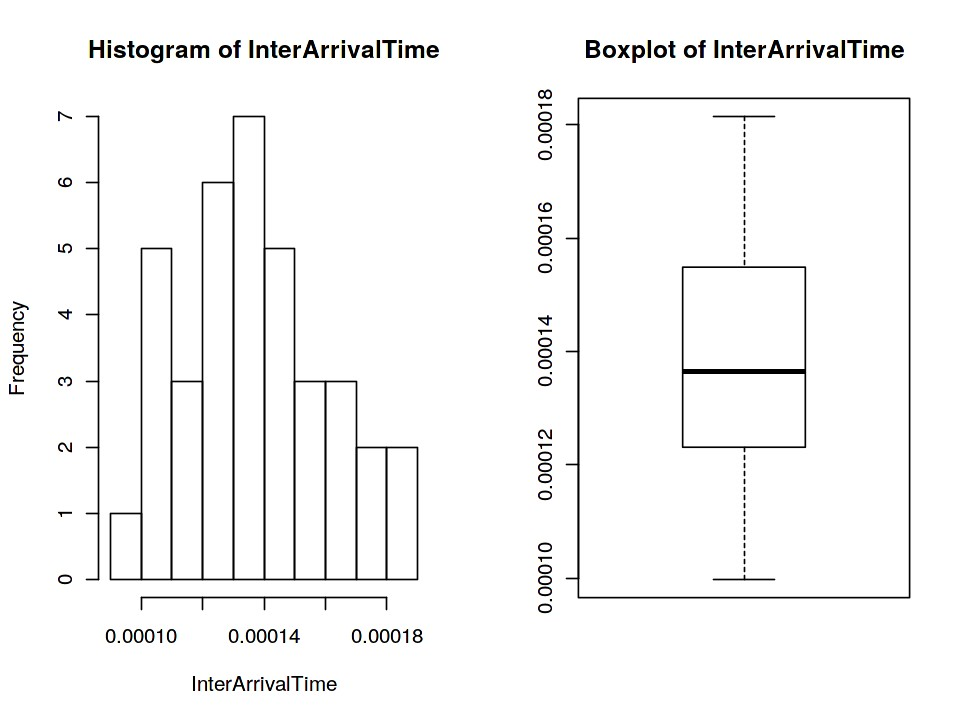

In [5]:
layout20x(1, 2)
hist(InterArrivalTime)
boxplot(InterArrivalTime, main = "Boxplot of InterArrivalTime")

In [6]:
summaryStats(InterArrivalTime)

Minimum value:           0 
Maximum value:           0 
Mean value:              0 
Median:                  0 
Upper quartile:          0 
Lower quartile:          0 
Variance:                0 
Standard deviation:      0 
Midspread (IQR):         0 
Skewness:                0.16 
Number of data values:   37 


In [7]:
summaryStats(InterArrivalTime*10000)

Minimum value:           1 
Maximum value:           1.81 
Mean value:              1.37 
Median:                  1.36 
Upper quartile:          1.55 
Lower quartile:          1.23 
Variance:                0.05 
Standard deviation:      0.23 
Midspread (IQR):         0.32 
Skewness:                0.16 
Number of data values:   37 


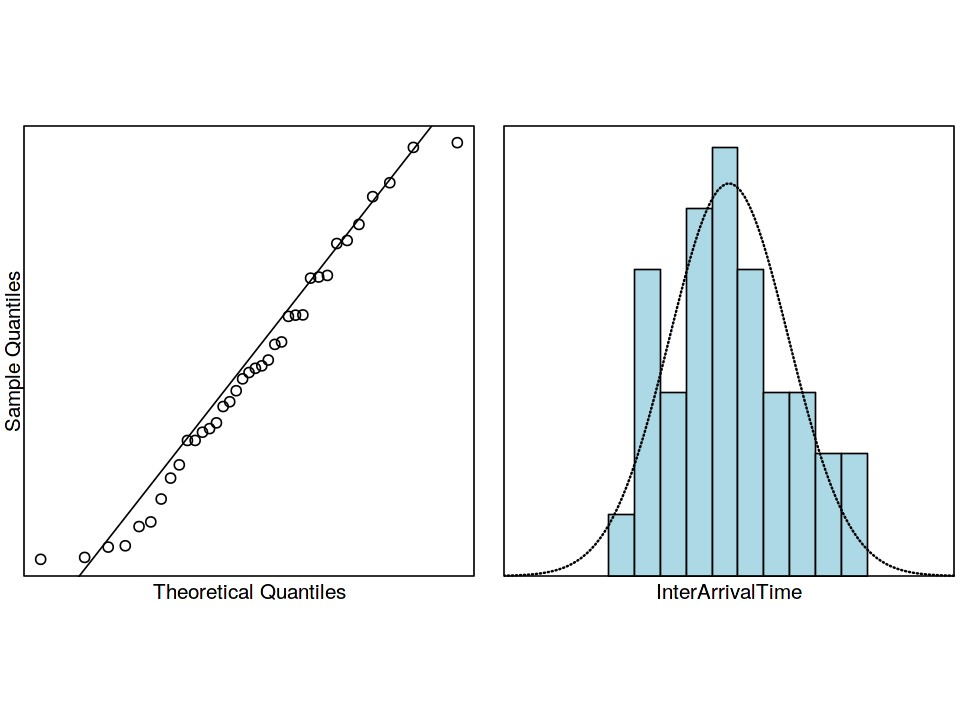

In [8]:
normcheck(InterArrivalTime)

In [9]:
t.test(InterArrivalTime)


	One Sample t-test

data:  InterArrivalTime
t = 36.084, df = 36, p-value < 2.2e-16
alternative hypothesis: true mean is not equal to 0
95 percent confidence interval:
 0.0001288848 0.0001442356
sample estimates:
   mean of x 
0.0001365602 


## Methods and Assumption Checks

We are attempting to estimate the mean of one group of observations, so
we do a one-sample \(t\)-test.

The arriving data packets should be independent of one another. The
Normality assumption appears to be satisfied as the points lie on the
straight line of the Q-Q plot.

The model fitted is ${\tt InterArrivalTime}_i = \mu + \varepsilon_i$,
where $\mu$ is the mean interarrival time and
$\varepsilon_i \overset{\text{iid}}{\sim} N(0, \sigma^2)$.

## Executive Summary

Our interest in these data was to estimate the mean interarrival time
for jobs to Server 26 in the Cecil SAN during the peak trafiic period.

We estimate that the mean interarrival time is between
$1.28 \times 10^{-4}$ and $1.44 \times 10^{-4}$ seconds.